## Instalación de paquetes

In [ ]:
if("tidyverse" %in% rownames(installed.packages()) == FALSE) {install.packages("tidyverse")}
if("corrplot" %in% rownames(installed.packages()) == FALSE) {install.packages("corrplot")}
if("faraway" %in% rownames(installed.packages()) == FALSE) {install.packages("faraway")}
if("nnet" %in% rownames(installed.packages()) == FALSE) {install.packages("nnet")}

# Conjunto de Datos

## Datos

In [ ]:
library("faraway")
# Cargamos datos
data(wbca)
# Guardamos con otro nombre por comodidad
data <- wbca
# Guardamos la matriz de correlacion
cor_matrix <- cor(data)
# Por comodidad pasamos al intervalo [0,1]
data <- data / 10.0
data$Class <- as.integer(data$Class * 10)

In [ ]:
library("tidyverse")
#
# Cambiamos nombre de columna de clase por
#
#   Y0 es 1 si es benigno, 0 si es maligno
#   Y1 es 1 si es maligno, 0 si es benigno
#
#   (Y0,Y1) es una codificacion OneHot de las observaciones
#
data$Y0 <- data$Class
data$Y1 <- as.integer(((-1)*data$Y0) + 1)
#
# Removemos la columna de clase
#
data <- data %>% select(-Class)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Análisis exploratorio de datos

### Vector de Medias y Matriz de Correlación

Al calcular las medias de cada variable en cada clase (centroides de clases) podemos notar que difieren bastante en cada clase.

In [ ]:
# Division por clases
class_0 <- data %>% filter(Y0 == "1") %>% select(-c(Y0, Y1))
class_1 <- data %>% filter(Y1 == "1") %>% select(-c(Y0, Y1))
# Calculo de medias muestrales
mean_0 <- as.vector(colMeans(class_0))
mean_1 <- as.vector(colMeans(class_1))

t(mean_0)
t(mean_1)

0.13386,0.1334086,0.2072235,0.2103837,0.1063205,0.124605,0.2952596,0.1408578,0.1300226


0.5567227,0.7651261,0.5966387,0.5327731,0.2609244,0.5861345,0.7197479,0.6546218,0.6563025


Podemos notar que algunas variables tienen una correlación con la variable de respuesta significativamente mayor a otras, además, como es de esperar, los coeficientes de corrrelación de la respuesta respecto a las demás variables son negativos.

corrplot 0.88 loaded



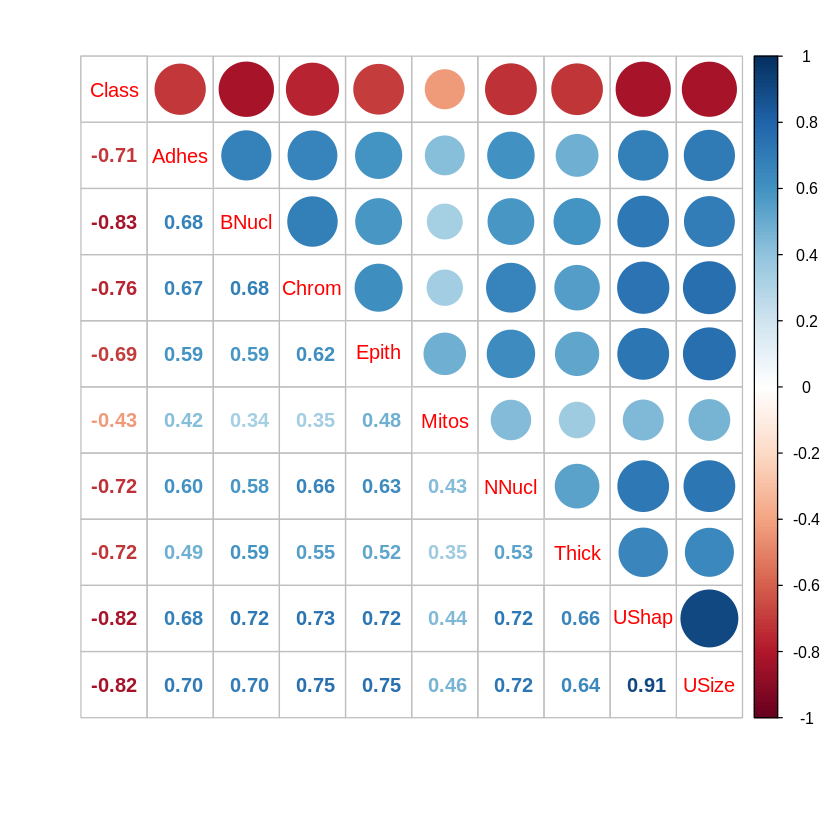

In [ ]:
library("corrplot")
corrplot.mixed(cor_matrix)

### Gráficas de dispersión.

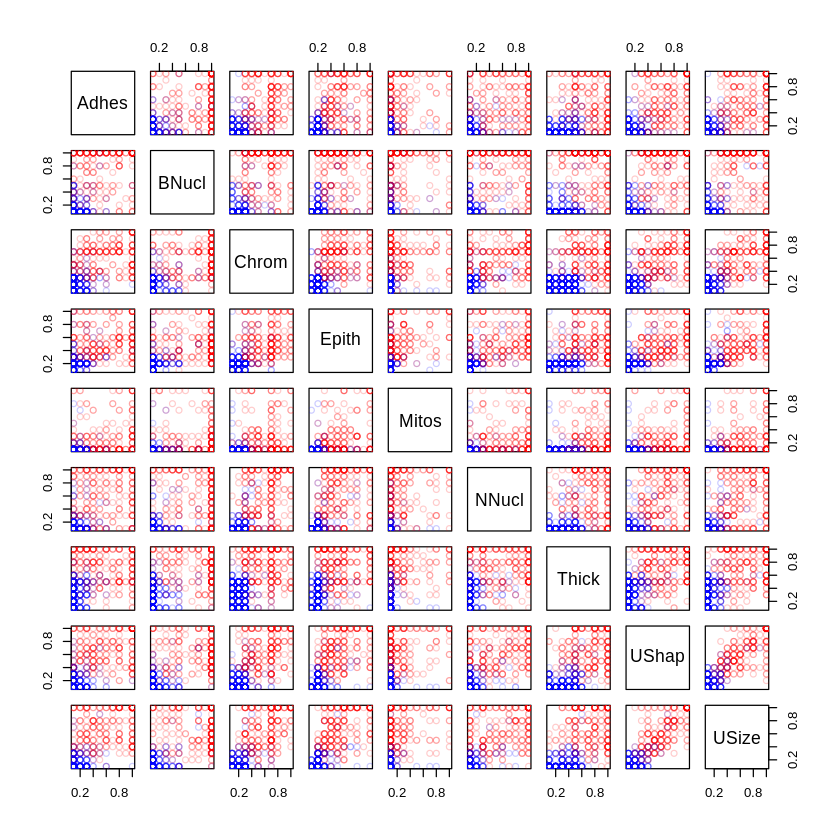

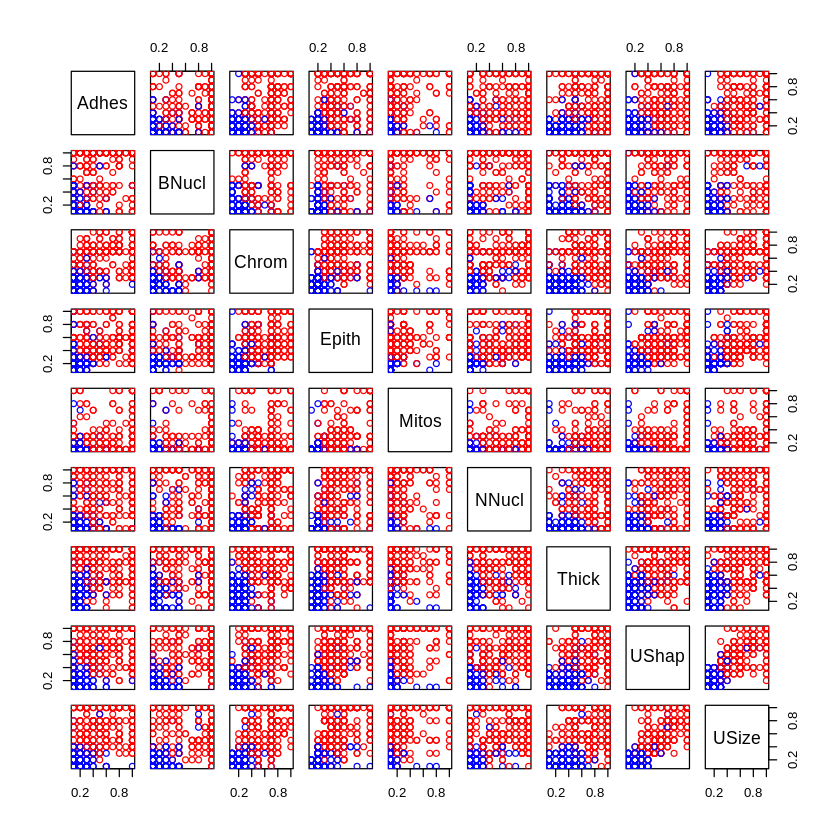

In [ ]:
numerical_data <- data %>% select(-c(Y0, Y1))
pairs(
    numerical_data, 
    col = c(
        rgb(red = 0.0, green = 0.0, blue = 1.0, alpha = 0.2),
        rgb(red = 1.0, green = 0.0, blue = 0.0, alpha = 0.2)
    )[data$Y1 + 1]
)

pairs(
    numerical_data, 
    col = c(
        rgb(red = 0.0, green = 0.0, blue = 1.0, alpha = 1.0),
        rgb(red = 1.0, green = 0.0, blue = 0.0, alpha = 1.0)
    )[data$Y1 + 1]
)

### Análisis de Componentes Principales

* Las primeras tres componentes explican un poco más del 80% de la varianza.
    * En la primera componente todas las variables tienen un peso parecido excepto por la variable `Mitos`, mientras que esta es la variable más importante en la segunda componente principal. En cuanto a la tercera componente, podemos decir que las variables que más importan son `Thick` y `Adhes`.
* Al visualizar las gráficas por parejas de las primeras tres componentes principales notamos fuerte separación de grupos salvo por la gráfica correspondiente a las componentes 2 y 3.

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.4299043 0.8803669 0.73381838 0.67919737 0.61600011
Proportion of Variance 0.6560483 0.0861162 0.05983216 0.05125656 0.04216179
Cumulative Proportion  0.6560483 0.7421645 0.80199666 0.85325323 0.89541502
                           Comp.6     Comp.7     Comp.8      Comp.9
Standard deviation     0.54864129 0.53937315 0.51022718 0.298332702
Proportion of Variance 0.03344525 0.03232482 0.02892575 0.009889156
Cumulative Proportion  0.92886027 0.96118509 0.99011084 1.000000000


Loadings:
      Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
Adhes  0.332         0.418  0.492         0.631  0.228  0.129       
BNucl  0.336  0.267         0.487  0.127 -0.337 -0.662              
Chrom  0.345  0.227  0.215        -0.225 -0.596  0.494  0.359       
Epith  0.336 -0.164        -0.425  0.647        -0.169  0.466       
Mitos  0.231 -0.904         0.261 -0.107 -0.202                     
NNucl  0.335         0.134 -0.429 -0.682  0.212 -0.402  0.108       
Thick  0.302  0.146 -0.863  0.131         0.206  0.131  0.241       
UShap  0.378               -0.172  0.102         0.101 -0.593  0.668
USize  0.381               -0.201  0.141         0.218 -0.457 -0.732

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111
Cumulative Var  0.111  0.222  0.333  0.444  0.556  0.667  0.778 

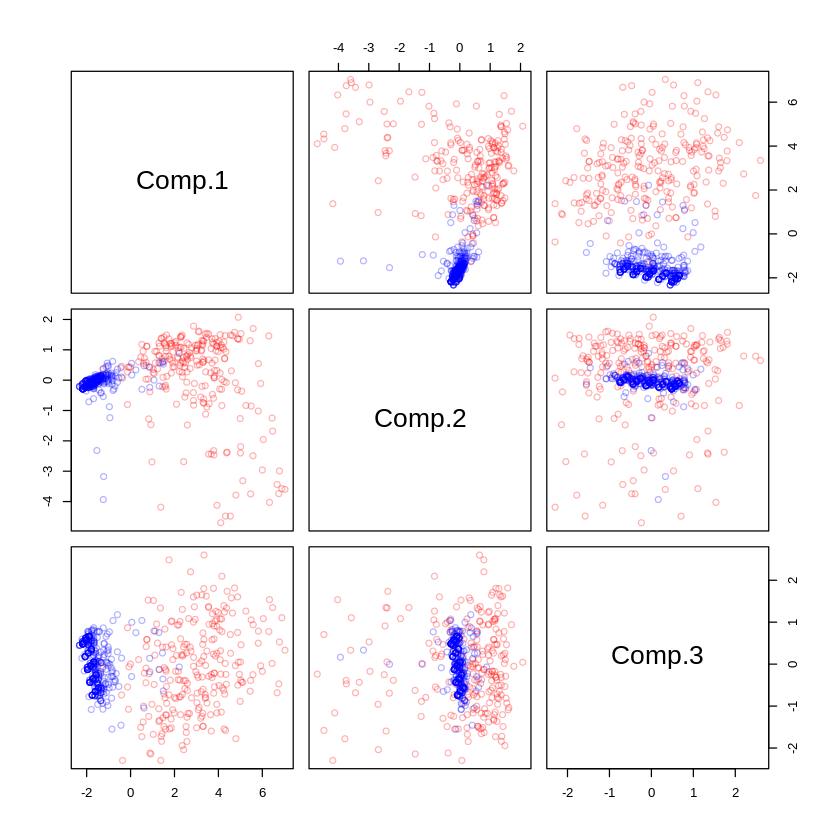

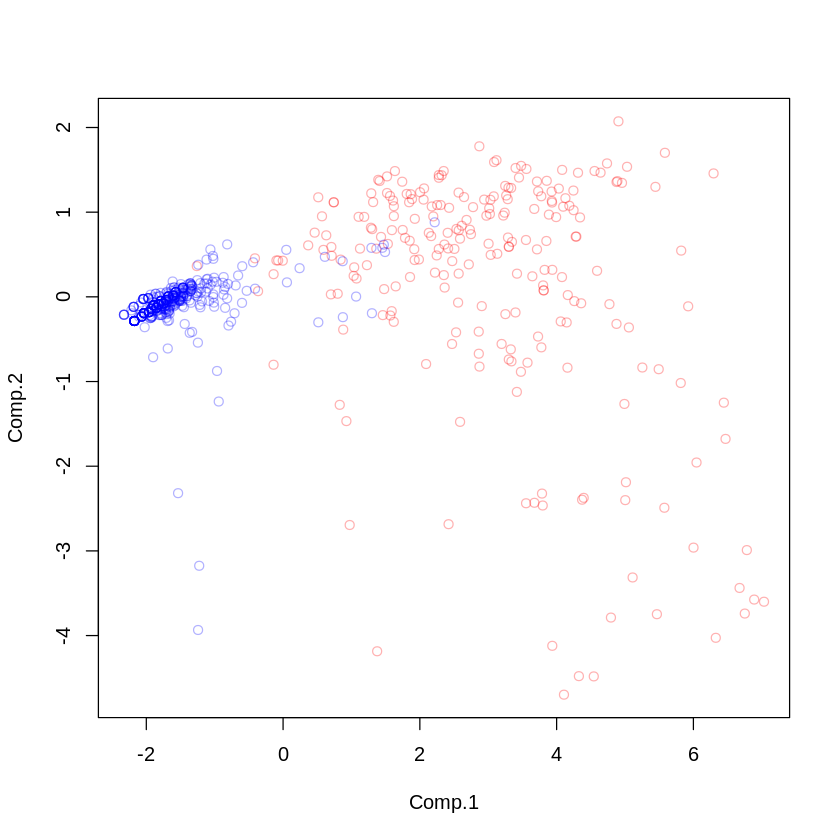

In [ ]:
pca <- princomp(numerical_data, cor=TRUE)

summary(pca)
pca$loadings

pca_data <- as.data.frame(pca$scores)
pca_data$Y <- data$Y0

### Falta calcular bien los cetroides
mean_0_plane <- t(matrix(pca$loadings, nrow=9)) %*% matrix(t(mean_0 - pca$center))
mean_1_plane <- t(matrix(pca$loadings, nrow=9)) %*% matrix(t(mean_1 - pca$center))

pairs(
    select(pca_data, Comp.1, Comp.2, Comp.3), 
    col = c(
        rgb(red = 0.0, green = 0.0, blue = 1.0, alpha = 0.3),
        rgb(red = 1.0, green = 0.0, blue = 0.0, alpha = 0.3)
    )[data$Y1 + 1]
)

plot(
    select(pca_data, Comp.1, Comp.2), 
    col = c(
        rgb(red = 0.0, green = 0.0, blue = 1.0, alpha = 0.3),
        rgb(red = 1.0, green = 0.0, blue = 0.0, alpha = 0.3)
    )[data$Y1 + 1]
)

## División en conjuntos de entrenamiento y prueba


In [ ]:
library("dplyr")
# 1. Dividimos en conjuntos disjuntos de 90% y 10% del total
sample_proportion <- 0.9
# 2. Creamos un ID por fila para hacer la division estratificada del conjunto
data <- data %>% mutate(id = row_number())
# 3. Dividimos en conjuntos de entrenamiento y prueba
set.seed(500)
train <- data %>% sample_frac(sample_proportion) # Division estratificada
test <- anti_join(data, train, by = 'id')
# 4. Eliminamos la columna auxiliar
train <- select(train, -id)
test <- select(test, -id)
data <- select(data, -id)

In [ ]:
# Guardamos la cantidad de registros en cada subconjunto
N_train <- nrow(train)
N_test <- nrow(test)
N_data <- nrow(data)

In [ ]:
# Observamos la cantidad de registros de cada clase en cada conjunto
"Data size"
table(data$Y1)
"Train size"
table(train$Y1)
"Test size"
table(test$Y1)

[1] "Data size"


  0   1 
443 238 

[1] "Train size"


  0   1 
397 216 

[1] "Test size"


 0  1 
46 22 

In [ ]:
# Verificamos que tengan la misma proporcion de registros por epecie
"Data size"
table(data$Y1) / N_data
"Train size"
table(train$Y1) / N_train
"Test size"
table(test$Y1) / N_test

[1] "Data size"


       0        1 
0.650514 0.349486 

[1] "Train size"


        0         1 
0.6476346 0.3523654 

[1] "Test size"


        0         1 
0.6764706 0.3235294 

# Regresión Logística

## Ajuste de modelos

Al ajustar un modelo $M1$ usando todas las variables y compararlo con el modelo saturado obtenemos una desviación residual de 75.47 con 603 grados de libertad. 75.47 está muy por debajo de 603, es decir, el modelo se ajusta bien a los datos, por lo que ahora tratamos de simplificar el modelo. 

La variable con el $p-$valor mayor es `USize` con una probabilidad de 0.751564, esto nos indica que no rechazemos la hipótesis de que el coeficiente asociado a este parámetro sea cero. 

In [ ]:
fit <- glm(
    cbind(Y0, Y1) ~ Adhes+BNucl+Chrom+Epith+Mitos+NNucl+Thick+UShap+USize, 
    family=binomial(link = logit),
    data=train
)
summary(fit)
# Guardamos la desviación residual
rd1 <- fit$deviance # 2(LL(Saturated Model) - LL(Proposed Model))
df1 <- fit$df.residual # df_Sat - df_Proposed
"Residual deviance"
rd1
"Degrees of Freedom"
df1


Call:
glm(formula = cbind(Y0, Y1) ~ Adhes + BNucl + Chrom + Epith + 
    Mitos + NNucl + Thick + UShap + USize, family = binomial(link = logit), 
    data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.16634  -0.01455   0.04458   0.08709   2.91359  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  11.4095     1.5711   7.262 3.81e-13 ***
Adhes        -3.6548     1.3355  -2.737 0.006208 ** 
BNucl        -3.8275     1.0582  -3.617 0.000298 ***
Chrom        -5.9988     2.1295  -2.817 0.004849 ** 
Epith        -1.5706     1.7285  -0.909 0.363536    
Mitos        -6.8521     3.8167  -1.795 0.072608 .  
NNucl        -2.7852     1.2984  -2.145 0.031945 *  
Thick        -5.9443     1.7479  -3.401 0.000672 ***
UShap        -3.0832     2.6219  -1.176 0.239621    
USize         0.7531     2.3789   0.317 0.751564    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family tak

[1] "Residual deviance"

[1] 75.46953

[1] "Degrees of Freedom"

[1] 603

Ajustamos un modelo $M2$ suponiendo que el coeficiente de la variable `USize` es 0. Si comparamos con el modelo $M1$, obtenemos una desviación de $0.097$ en 1 grado de libertad, lo cuál tiene una probabilidad de 0.75, por lo que $M2$ se ajusta bien a los datos. 

En este caso, la variable con el $p-$valor mayor es `Epith` con una probabilidad de 0.381 por lo que no rechazemos la hipótesis de que el coeficiente asociado a este parámetro sea cero. 

In [ ]:
fit <- glm(
    cbind(Y0, Y1) ~ Adhes+BNucl+Chrom+Epith+Mitos+NNucl+Thick+UShap, 
    family=binomial(link = logit),,
    data=train
)
summary(fit)
# Guardamos la desviación residual
rd2 <- fit$deviance # 2(LL(Saturated Model) - LL(Proposed Model))
df2 <- fit$df.residual # df_Sat - df_Proposed

"M2 Residual Deviance - M1 Residual Deviance = 2(l_1 - l_2)"
rd2 - rd1
"M2 Degrees of Freedom - M1 Degrees of Freedom = q"
df2 - df1 
"Prob"
1-pchisq(rd2 - rd1, df2 - df1)


Call:
glm(formula = cbind(Y0, Y1) ~ Adhes + BNucl + Chrom + Epith + 
    Mitos + NNucl + Thick + UShap, family = binomial(link = logit), 
    data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.18084  -0.01459   0.04550   0.08829   2.90757  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   11.338      1.545   7.337 2.19e-13 ***
Adhes         -3.574      1.308  -2.732 0.006286 ** 
BNucl         -3.836      1.062  -3.612 0.000304 ***
Chrom         -5.940      2.129  -2.790 0.005274 ** 
Epith         -1.498      1.713  -0.874 0.381942    
Mitos         -6.804      3.767  -1.806 0.070862 .  
NNucl         -2.732      1.289  -2.120 0.033982 *  
Thick         -5.905      1.740  -3.394 0.000689 ***
UShap         -2.488      1.866  -1.333 0.182412    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 795.550  on 612  degrees of f

[1] "M2 Residual Deviance - M1 Residual Deviance = 2(l_1 - l_2)"

[1] 0.09732894

[1] "M2 Degrees of Freedom - M1 Degrees of Freedom = q"

[1] 1

[1] "Prob"

[1] 0.7550589

Ahora ajustamos un modelo $M3$ suponiendo que el coeficiente de la variable `Epith` es 0. Si comparamos con el modelo $M2$, obtenemos una desviación de 0.749 en 1 grado de libertad, lo cuál tiene una probabilidad de 0.386. Debido a que la probabilidad es significativamente menor a 0.5 nos quedamos con el modelo $M2$

In [ ]:
fit <- glm(
    cbind(Y0, Y1) ~ Adhes+BNucl+Chrom+Mitos+NNucl+Thick+UShap, 
    family=binomial(link = logit),
    data=train
)
summary(fit)
# Guardamos la desviación residual
rd3 <- fit$deviance # 2(LL(Saturated Model) - LL(Proposed Model))
df3 <- fit$df.residual # df_Sat - df_Proposed
"M3 Residual Deviance - M2 Residual Deviance = 2(l_2 - l_3)"
rd3 - rd2
"M3 Degrees of Freedom - M2 Degrees of Freedom = q"
df3 - df2 
"Prob"
1-pchisq(rd3 - rd2, df3 - df2)


Call:
glm(formula = cbind(Y0, Y1) ~ Adhes + BNucl + Chrom + Mitos + 
    NNucl + Thick + UShap, family = binomial(link = logit), data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.05838  -0.01229   0.04897   0.09008   2.96269  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   11.136      1.487   7.487 7.06e-14 ***
Adhes         -3.764      1.291  -2.916 0.003547 ** 
BNucl         -3.901      1.067  -3.657 0.000256 ***
Chrom         -6.270      2.075  -3.021 0.002515 ** 
Mitos         -6.625      3.767  -1.759 0.078620 .  
NNucl         -2.889      1.307  -2.211 0.027070 *  
Thick         -5.932      1.718  -3.454 0.000553 ***
UShap         -2.853      1.871  -1.525 0.127347    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 795.550  on 612  degrees of freedom
Residual deviance:  76.316  on 605  degrees of freedom
AIC:

[1] "M3 Residual Deviance - M2 Residual Deviance = 2(l_2 - l_3)"

[1] 0.7493929

[1] "M3 Degrees of Freedom - M2 Degrees of Freedom = q"

[1] 1

[1] "Prob"

[1] 0.3866685

In [ ]:
fit <- glm(
    cbind(Y0, Y1) ~ Adhes+BNucl+Chrom+Epith+Mitos+NNucl+Thick+UShap, 
    family=binomial(link = logit),,
    data=train
)

## Predicción

Con un clasificador basado en el modelo $M2$ asignando a la categoría más probable, obtenemos una precisión de 0.97 sobre el conjunto de prueba. 

In [ ]:
pred <- predict(fit, newdata = test, type = "response")
# pred nos devuelve la probabilidad de que sea benigno
pred <- as.integer(pred < 0.5)

"Matriz de confusion"
table <- table(test$Y1, pred)
table
"Precision sobre conjunto de prueba"
accuracy <- sum(diag(table)) / sum(table)
accuracy

[1] "Matriz de confusion"

   pred
     0  1
  0 46  0
  1  2 20

[1] "Precision sobre conjunto de prueba"

[1] 0.9705882

# Redes Neuronales

Ahora, construimos clasificadores basados en redes neuronales. En todos los casos usamos un máximo número de iteraciones de 1000, pero variamos la cantidad de neuronas en la capa oculta, además, debido a que la salida de la cada red es un vector de probabilidades, hacemos la clasificación tomando la categoría más probable.

In [ ]:
library("nnet")

## Modelos que usan todas las variables

In [ ]:
set.seed(1234)
nn <- nnet(
    cbind(Y0, Y1) ~ ., 
    data=train, 
    size=10, 
    maxit=1000, 
    softmax=TRUE
)

pred <- predict(nn, newdata = test)
# Dado que la red regresa un vector de probabilidades, 
# usamos la componente que nos indica la probabilidad 
# de que un correo sea spam
aux <- c()
for(i in 1:nrow(pred)){
    if(pred[i,1] <= pred[i,2]){
        aux <- c(aux, 1)
    }else{
        aux <- c(aux, 0)
    }
}
pred <- as.integer(aux)

# weights:  122
initial  value 885.575851 
iter  10 value 33.768973
iter  20 value 23.271380
iter  30 value 4.514003
iter  40 value 0.053906
iter  50 value 0.000458
final  value 0.000066 
converged


In [ ]:
"Matriz de confusion"
table <- table(test$Y1, pred)
table
"Precision sobre conjunto de prueba"
accuracy <- sum(diag(table)) / sum(table)
accuracy

[1] "Matriz de confusion"

   pred
     0  1
  0 44  2
  1  2 20

[1] "Precision sobre conjunto de prueba"

[1] 0.9411765

In [ ]:
set.seed(1234)
nn <- nnet(
    cbind(Y0, Y1) ~ ., 
    data=train, 
    size=5, 
    maxit=1000, 
    softmax=TRUE
)

pred <- predict(nn, newdata = test)
# Dado que la red regresa un vector de probabilidades, 
# usamos la componente que nos indica la probabilidad 
# de que un correo sea spam
aux <- c()
for(i in 1:nrow(pred)){
    if(pred[i,1] <= pred[i,2]){
        aux <- c(aux, 1)
    }else{
        aux <- c(aux, 0)
    }
}
pred <- as.integer(aux)

# weights:  62
initial  value 529.477474 
iter  10 value 36.183876
iter  20 value 30.611604
iter  30 value 19.219081
iter  40 value 11.041881
iter  50 value 8.536018
iter  60 value 7.315012
iter  70 value 7.213720
iter  80 value 7.210375
iter  90 value 7.210306
final  value 7.210300 
converged


In [ ]:
"Matriz de confusion"
table <- table(test$Y1, pred)
table
"Precision sobre conjunto de prueba"
accuracy <- sum(diag(table)) / sum(table)
accuracy

[1] "Matriz de confusion"

   pred
     0  1
  0 46  0
  1  4 18

[1] "Precision sobre conjunto de prueba"

[1] 0.9411765

In [ ]:
set.seed(1234)
nn <- nnet(
    Y1 ~ ., 
    data=train, 
    size=1, 
    maxit=1000, 
    softmax=FALSE
)

pred <- predict(nn, newdata = test)
# Dado que la red regresa un vector de probabilidades, 
# usamos la componente que nos indica la probabilidad 
# de que un correo sea spam
aux <- c()
for(i in 1:nrow(pred)){
    if(pred[i] >= 0.5){
        aux <- c(aux, 1)
    }else{
        aux <- c(aux, 0)
    }
}
pred <- as.integer(aux)

# weights:  13
initial  value 149.474536 
iter  10 value 4.997764
iter  20 value 4.997710
iter  30 value 4.997654
iter  40 value 4.997595
iter  50 value 4.997533
iter  60 value 4.997468
iter  70 value 4.997398
iter  80 value 4.997325
iter  90 value 4.997248
iter 100 value 4.997166
iter 110 value 4.997078
iter 120 value 4.996985
iter 130 value 4.996885
iter 140 value 4.996779
iter 150 value 4.996664
iter 160 value 4.996541
iter 170 value 4.996408
iter 180 value 4.996264
iter 190 value 4.996107
iter 200 value 4.995935
iter 210 value 4.995747
iter 220 value 4.995540
iter 230 value 4.995309
iter 240 value 4.995052
iter 250 value 4.994762
iter 260 value 4.994432
iter 270 value 4.994052
iter 280 value 4.993610
iter 290 value 4.993084
iter 300 value 4.992447
iter 310 value 4.991648
iter 320 value 4.990600
iter 330 value 4.989117
iter 340 value 4.986699
iter 350 value 4.980958
iter 360 value 0.996805
iter 370 value 0.996727
iter 380 value 0.996645
iter 390 value 0.996559
iter 400 value 0.99646

In [ ]:
"Matriz de confusion"
table <- table(test$Y1, pred)
table
"Precision sobre conjunto de prueba"
accuracy <- sum(diag(table)) / sum(table)
accuracy

[1] "Matriz de confusion"

   pred
     0  1
  0 46  0
  1  0 22

[1] "Precision sobre conjunto de prueba"

[1] 1

## Modelo que usa variables significativas según regresión logística

In [ ]:
set.seed(1234)
nn <- nnet(
    cbind(Y0, Y1) ~ Adhes+BNucl+Chrom+Epith+Mitos+NNucl+Thick+UShap, 
    data=train, 
    size=10, 
    maxit=1000, 
    softmax=TRUE
)

pred <- predict(nn, newdata = test)
# Dado que la red regresa un vector de probabilidades, 
# usamos la componente que nos indica la probabilidad 
# de que un correo sea spam
aux <- c()
for(i in 1:nrow(pred)){
    if(pred[i,1] <= pred[i,2]){
        aux <- c(aux, 1)
    }else{
        aux <- c(aux, 0)
    }
}
pred <- as.integer(aux)

# weights:  112
initial  value 461.566411 
iter  10 value 36.977388
iter  20 value 24.688011
iter  30 value 15.753811
iter  40 value 7.721012
iter  50 value 4.866064
iter  60 value 0.516752
iter  70 value 0.022724
iter  80 value 0.003141
iter  90 value 0.000737
iter 100 value 0.000457
iter 110 value 0.000386
final  value 0.000098 
converged


In [ ]:
"Matriz de confusion"
table <- table(test$Y1, pred)
table
"Precision sobre conjunto de prueba"
accuracy <- sum(diag(table)) / sum(table)
accuracy

[1] "Matriz de confusion"

   pred
     0  1
  0 43  3
  1  3 19

[1] "Precision sobre conjunto de prueba"

[1] 0.9117647

In [ ]:
set.seed(1234)
nn <- nnet(
    Y1 ~ Adhes+BNucl+Chrom+Epith+Mitos+NNucl+Thick+UShap, 
    data=train, 
    size=1, 
    maxit=1000, 
    softmax=FALSE
)
summary(nn)
pred <- predict(nn, newdata = test)
# Dado que la red regresa un vector de probabilidades, 
# usamos la componente que nos indica la probabilidad 
# de que un correo sea spam
aux <- c()
for(i in 1:nrow(pred)){
    if(pred[i] >= 0.5){
        aux <- c(aux, 1)
    }else{
        aux <- c(aux, 0)
    }
}
pred <- as.integer(aux)

# weights:  11
initial  value 159.080859 
iter  10 value 11.085580
iter  20 value 10.094093
iter  30 value 9.664887
iter  40 value 8.761105
iter  50 value 8.739007
iter  60 value 8.715467
iter  70 value 8.700885
iter  80 value 8.691544
iter  90 value 8.680376
iter 100 value 8.677777
iter 110 value 8.669728
iter 120 value 8.667879
iter 130 value 8.666383
iter 140 value 8.665165
iter 150 value 8.663089
iter 160 value 8.661726
iter 170 value 8.660714
iter 180 value 8.660175
iter 190 value 8.658365
iter 200 value 8.657184
iter 210 value 8.655740
iter 220 value 8.655335
iter 230 value 8.654974
iter 240 value 8.653368
iter 250 value 8.652171
iter 260 value 8.651537
iter 270 value 8.651435
iter 280 value 8.651126
iter 290 value 8.650267
iter 300 value 8.649696
iter 310 value 8.649056
iter 320 value 8.648910
iter 330 value 8.648712
iter 340 value 8.648087
iter 350 value 8.647665
iter 360 value 8.647405
iter 370 value 8.647308
iter 380 value 8.647193
iter 390 value 8.647076
iter 400 value 8.646

a 8-1-1 network with 11 weights
options were -
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 i5->h1 i6->h1 i7->h1 i8->h1 
-45.28  17.72  28.95  22.68  -5.69  25.43   4.85  32.64  34.99 
  b->o  h1->o 
-25.36  28.54 

In [ ]:
"Matriz de confusion"
table <- table(test$Y1, pred)
table
"Precision sobre conjunto de prueba"
accuracy <- sum(diag(table)) / sum(table)
accuracy

[1] "Matriz de confusion"

   pred
     0  1
  0 43  3
  1  1 21

[1] "Precision sobre conjunto de prueba"

[1] 0.9411765

# Conclusiones

Ajustamos un modelo de regresión logística a los datos y construimos un clasificador que logró una precisión de $0.97$ sobre el conjunto de prueba sin la necesidad de usar todas las variables. Por otro lado, se eligió un modelo basado en redes neuronales simple, que obtuvo una precisión de $1.0$ sobre el conjunto de prueba.

Si comparamos ambos modelos, podemos notar que el clasificador basado en redes neuronales logra la mejor precisión sobre el conjunto de prueba ($1.0$ vs $0.97$), mientras que el clasificador basado en regresión logística usa una cantidad menor de parámetros ($9$ vs $11$). También, cabe señalar que los dos parámeros extra se deben a la forma en que `R` construye la red.

También, al clasificar podríamos tomar en cuenta que un falso negativo (clasificar como benigno un tummor maligno) es más grave que un falso positivo (clasificar como maligno uno benigno).

En conclusion, los modelos basados en redes neuronales y regresión logística se ajustan bien a los datos, además de servir para clasificar con una excelente precisión.